# 1.0 PROJECT OVERVIEW

The complex ecosystem of airports, supporting organisations, and aircraft used for general aviation, commercial aviation, and military activities is referred to as the aviation industry. General aviation incorporates private air travel wheteher for business or pleasure. Commercial aviation focusses on public transportation of passengers and cargo. On the other hand, millitary aviation encompasses all flights operated by the armed forces. 

4.6% of Kenya's yearly GDP is contributed by the aviation sector (KNBS, 2022). In 2017, Kenya handled over 4.6 million passenger travels, resulting in a $3.2 billion gross value addition to the country's GDP from the tourism and aviation sectors. This also translated into 410,000 jobs.

Internationally, the commercial aviation sector experienced 30 accidents in 2023 as compared to 42 accidents in 2022.Therefore, between 2022 and 2023, the overall accident rate dropped from 1.30 per million sectors to 0.80. Overall, one accident occurred per every 880,293 flights on average (IATA Annual Safety Report, 2023). According to statistics, human error is to blame for up to 80% of all aviation accidents. Takeoff and landing, as well as the moments just before and after, are the riskiest times.

According to a 2022 security audit conducted by the International Civil Aviation Organisation (ICAO), Kenya has the second-best aviation safety standards in Africa, scoring 91.77%.

# 2.0 BUSINESS UNDERSTANDING

Maureen Inc. is diversifying its holdings and considers entry into the aviation industry. Its specific interest is in the genearal and commericial services. The company plans to procure aircrafts for the new venture. To help in decision making, the company would like insihgts on the aircrafts that would have the lowest risk for the aviation division. 

# 3.0 DATA UNDERSTANDING

## 3.1 Problem Statement
Identify the least risky planes (aircrafts) for Maureen Inc. to launch its new venture

## 3.2 Metrics of Success
The project will be a success if i am able to identify low risk aircrafts and the factors affecting aircraft safety.

## 3.3 Methodology
The analysis adopts the first three phases of CRISP - DM that is Domain knowledge (Business Understanding), Data Understanding and Data Preparation.

## 3.4 Data Description

Importing Libraries

In [136]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset from csv files

In [137]:
#Reading data from the CSV file

df = pd.read_csv('Data/AviationData.csv')
df1 = pd.read_csv('Data/USState_Codes.csv')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Previewing the Aviation Data Set

In [138]:
#first five rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [139]:
#Last five rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


Accessing information about the data set

In [140]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

The dataset has 88889 entries with 31 columns. A number of the columns had missing values e.g. Airport Code, Aircraft Category, Engine Type, Aircraft Dmage etc

The dataset is made up of two main data types, 5 columns of integer (float) type and 25 columns of type string (object)

In [141]:
df.shape

(88889, 31)

The data set ia made up of 88889 rows and 31 columns

In [142]:
#names of the data columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Summary Statistics

In [143]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


A total of 77,488 fatalities were reported from aircraft accident between 1962 and 2023. Serious injuries reported from the accidents during the same period were 76,379 compared to 76,956 minor injuries. 82,977 were uninjured from the incidents. The aircrafts under analysis had an average of one engine 

Creating a deep copy of the dataframe df.

In [144]:
#Deep copy copies the original data frame and assigns it to a new dataframe with new names
#The deep copy is a true replica of the original dataset and independent of the original. The deep copy has its own memory loaction and data.
# Any changes make on the original dataset will not affect the copy and vice versa.

df2 = df.copy(deep=True) 

# 4.0 DATA PREPARATION

## 4.1 Data Cleaning

### Validity Test/Challenges

a) Dropping irrelevant observations

In [145]:
df2.drop(['Publication.Date', 'Schedule', 'Latitude', 'Longitude', 'FAR.Description', 'Airport.Name', 'Airport.Code', 'Aircraft.Category', 'Air.carrier' ], axis=1, inplace=True)
df2.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [146]:
df2.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

Syntax Errors:
b) Removing leading and trailing spaces in columns

In [147]:
df2.columns = df2.columns.str.strip()
df2.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


c) Removing . between column names and replacing with space

In [148]:
df2.columns = df2.columns.str.replace('.', ' ')
df2.columns

<ipython-input-148-3410bcadee4b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2.columns = df2.columns.str.replace('.', ' ')


Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Injury Severity', 'Aircraft damage',
       'Registration Number', 'Make', 'Model', 'Amateur Built',
       'Number of Engines', 'Engine Type', 'Purpose of flight',
       'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad phase of flight', 'Report Status'],
      dtype='object')

In [149]:
df2.dtypes

Event Id                   object
Investigation Type         object
Accident Number            object
Event Date                 object
Location                   object
Country                    object
Injury Severity            object
Aircraft damage            object
Registration Number        object
Make                       object
Model                      object
Amateur Built              object
Number of Engines         float64
Engine Type                object
Purpose of flight          object
Total Fatal Injuries      float64
Total Serious Injuries    float64
Total Minor Injuries      float64
Total Uninjured           float64
Weather Condition          object
Broad phase of flight      object
Report Status              object
dtype: object

d) Convert Event date from string to date data type

In [150]:
df2['Event Date'] = pd.to_datetime(df2['Event Date'])
df2.dtypes

Event Id                          object
Investigation Type                object
Accident Number                   object
Event Date                datetime64[ns]
Location                          object
Country                           object
Injury Severity                   object
Aircraft damage                   object
Registration Number               object
Make                              object
Model                             object
Amateur Built                     object
Number of Engines                float64
Engine Type                       object
Purpose of flight                 object
Total Fatal Injuries             float64
Total Serious Injuries           float64
Total Minor Injuries             float64
Total Uninjured                  float64
Weather Condition                 object
Broad phase of flight             object
Report Status                     object
dtype: object

In [151]:
df2.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Injury Severity,Aircraft damage,Registration Number,Make,...,Number of Engines,Engine Type,Purpose of flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Report Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [152]:
df2['Number of Engines'].unique()

array([ 1., nan,  2.,  0.,  3.,  4.,  8.,  6.])

### Accuracy Test/Challenges

Identifying and clearing outliers

<AxesSubplot:>

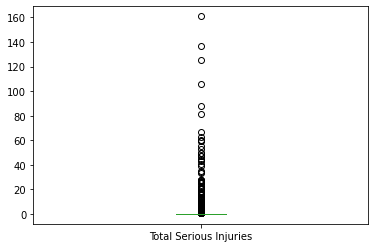

In [153]:
df2.boxplot(column=['Total Serious Injuries'], grid=False)

<AxesSubplot:>

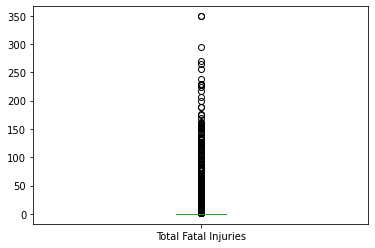

In [154]:
df2.boxplot(column=['Total Fatal Injuries'], grid=False)

<AxesSubplot:>

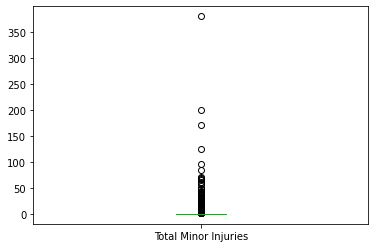

In [155]:
df2.boxplot(column=['Total Minor Injuries'], grid=False)

<AxesSubplot:>

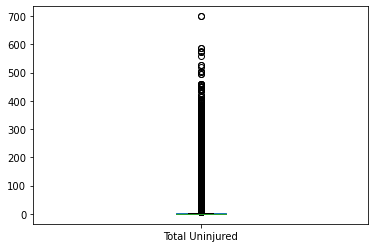

In [156]:
df2.boxplot(column=['Total Uninjured'], grid=False)

In [157]:
# definition a function for handling outliers
def handle_outliers(df2, column):
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 - 1.5 * IQR
    df2[column] = df2[column].clip(lower=lower_bound, upper=upper_bound)
    return df2


In [158]:
df2 = handle_outliers(df2, 'Total Minor Injuries')
df2

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Injury Severity,Aircraft damage,Registration Number,Make,...,Number of Engines,Engine Type,Purpose of flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Report Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


<AxesSubplot:>

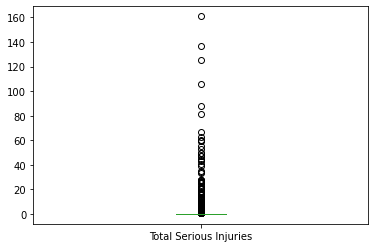

In [159]:
df2.boxplot(column=['Total Serious Injuries'], grid=False)

### Completeness Test/Challenges

Dropping all rows with missing values and creating a new cleaned dataframe to provide for credibility of the dataset

In [160]:
clean_df2 = df2.dropna()
clean_df2

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Injury Severity,Aircraft damage,Registration Number,Make,...,Number of Engines,Engine Type,Purpose of flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Report Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63893,20080104X00022,Accident,MIA08LA032,2007-12-26,"SARASOTA, FL",United States,Non-Fatal,Substantial,N5875Q,Mooney,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,0.0,VMC,Takeoff,Probable Cause
63896,20071231X02008,Incident,DEN08IA044,2007-12-26,"Aspen, CO",United States,Incident,Minor,N47BC,Piper,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,Climb,Probable Cause
63900,20080102X00006,Accident,SEA08LA054,2007-12-28,"MURRIETA, CA",United States,Non-Fatal,Substantial,N365SX,Hein,...,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Cruise,Probable Cause
63906,20080103X00010,Accident,DFW08LA052,2007-12-29,"Crowley, TX",United States,Fatal(2),Destroyed,N136DG,Althouse,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause


In [161]:
#checking missing values
clean_df2.isnull().sum()

Event Id                  0
Investigation Type        0
Accident Number           0
Event Date                0
Location                  0
Country                   0
Injury Severity           0
Aircraft damage           0
Registration Number       0
Make                      0
Model                     0
Amateur Built             0
Number of Engines         0
Engine Type               0
Purpose of flight         0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Total Uninjured           0
Weather Condition         0
Broad phase of flight     0
Report Status             0
dtype: int64

### Checking for duplicates in the dataset

In [162]:
clean_df2.duplicated().any()


False

No duplicates observed

In [163]:
clean_df2.dtypes

Event Id                          object
Investigation Type                object
Accident Number                   object
Event Date                datetime64[ns]
Location                          object
Country                           object
Injury Severity                   object
Aircraft damage                   object
Registration Number               object
Make                              object
Model                             object
Amateur Built                     object
Number of Engines                float64
Engine Type                       object
Purpose of flight                 object
Total Fatal Injuries             float64
Total Serious Injuries           float64
Total Minor Injuries             float64
Total Uninjured                  float64
Weather Condition                 object
Broad phase of flight             object
Report Status                     object
dtype: object

In [164]:
# Fixing colum names to be in upper case
clean_df2.columns = map(lambda x: str(x).upper(), clean_df2)
clean_df2.head()

,EVENT ID,INVESTIGATION TYPE,ACCIDENT NUMBER,EVENT DATE,LOCATION,COUNTRY,INJURY SEVERITY,AIRCRAFT DAMAGE,REGISTRATION NUMBER,MAKE,...,NUMBER OF ENGINES,ENGINE TYPE,PURPOSE OF FLIGHT,TOTAL FATAL INJURIES,TOTAL SERIOUS INJURIES,TOTAL MINOR INJURIES,TOTAL UNINJURED,WEATHER CONDITION,BROAD PHASE OF FLIGHT,REPORT STATUS
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause


### Exporting the Cleaned Dataset 

In [165]:
clean_df2.to_csv('cleaned_aviation_data.csv')

## 4.2 Data Analysis

In [166]:
df3 = pd.read_csv('cleaned_aviation_data.csv')
df3.head()

,Unnamed: 0,EVENT ID,INVESTIGATION TYPE,ACCIDENT NUMBER,EVENT DATE,LOCATION,COUNTRY,INJURY SEVERITY,AIRCRAFT DAMAGE,REGISTRATION NUMBER,...,NUMBER OF ENGINES,ENGINE TYPE,PURPOSE OF FLIGHT,TOTAL FATAL INJURIES,TOTAL SERIOUS INJURIES,TOTAL MINOR INJURIES,TOTAL UNINJURED,WEATHER CONDITION,BROAD PHASE OF FLIGHT,REPORT STATUS
0,0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
3,6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause
4,7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause


In [167]:
#delete the unnamed column
df3.drop(['Unnamed: 0'], axis=1, inplace=True)
df3.head()

,EVENT ID,INVESTIGATION TYPE,ACCIDENT NUMBER,EVENT DATE,LOCATION,COUNTRY,INJURY SEVERITY,AIRCRAFT DAMAGE,REGISTRATION NUMBER,MAKE,...,NUMBER OF ENGINES,ENGINE TYPE,PURPOSE OF FLIGHT,TOTAL FATAL INJURIES,TOTAL SERIOUS INJURIES,TOTAL MINOR INJURIES,TOTAL UNINJURED,WEATHER CONDITION,BROAD PHASE OF FLIGHT,REPORT STATUS
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
3,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause
4,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause


In [168]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46498 entries, 0 to 46497
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EVENT ID                46498 non-null  object 
 1   INVESTIGATION TYPE      46498 non-null  object 
 2   ACCIDENT NUMBER         46498 non-null  object 
 3   EVENT DATE              46498 non-null  object 
 4   LOCATION                46498 non-null  object 
 5   COUNTRY                 46498 non-null  object 
 6   INJURY SEVERITY         46498 non-null  object 
 7   AIRCRAFT DAMAGE         46498 non-null  object 
 8   REGISTRATION NUMBER     46498 non-null  object 
 9   MAKE                    46498 non-null  object 
 10  MODEL                   46498 non-null  object 
 11  AMATEUR BUILT           46498 non-null  object 
 12  NUMBER OF ENGINES       46498 non-null  float64
 13  ENGINE TYPE             46498 non-null  object 
 14  PURPOSE OF FLIGHT       46498 non-null

In [169]:
df3.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46498 entries, 0 to 46497
Columns: 22 entries, EVENT ID to REPORT STATUS
dtypes: float64(5), object(17)
memory usage: 7.8+ MB


Concise Summary Statistics

In [170]:
df3.describe()

,NUMBER OF ENGINES,TOTAL FATAL INJURIES,TOTAL SERIOUS INJURIES,TOTAL MINOR INJURIES,TOTAL UNINJURED
count,46498.000000,46498.000000,46498.000000,46498.0,46498.000000
mean,1.133834,0.399910,0.192718,0.0,2.704934
std,0.409843,2.338675,0.824727,0.0,16.927730
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.000000,0.000000,0.0,2.000000
max,4.000000,230.000000,81.000000,0.0,507.000000


Describing Categorical data

In [171]:
df3.describe(include='object')

,EVENT ID,INVESTIGATION TYPE,ACCIDENT NUMBER,EVENT DATE,LOCATION,COUNTRY,INJURY SEVERITY,AIRCRAFT DAMAGE,REGISTRATION NUMBER,MAKE,MODEL,AMATEUR BUILT,ENGINE TYPE,PURPOSE OF FLIGHT,WEATHER CONDITION,BROAD PHASE OF FLIGHT,REPORT STATUS
count,46498,46498,46498,46498,46498,46498,46498,46498,46498,46498,46498,46498,46498,46498,46498,46498,46498
unique,45897,2,46498,6957,13280,36,43,3,43292,3100,6199,2,6,16,3,12,2
top,20001214X45071,Accident,MKC83LA104,1982-05-16,"ANCHORAGE, AK",United States,Non-Fatal,Substantial,NONE,Cessna,152,No,Reciprocating,Personal,VMC,Landing,Probable Cause
freq,3,45530,1,25,346,46231,36677,32801,292,16722,1869,42607,41976,26989,42290,11366,46497


Out of 46,498 incidents and accidents, there was a reported 36,677 non-fatal injuries and 32,801 substantial damages to the aircraft. 11,366 of the incidences occurred during landing with 42,290 occuring during VMC weather conditions. 41,976 of the incidences involved aircrafts with reciprocating engine.

### 4.2.1 Univariate analysis

In [172]:
mode_values = df3[['INVESTIGATION TYPE', 'NUMBER OF ENGINES' ,'INJURY SEVERITY', 'AIRCRAFT DAMAGE', 'MAKE','MODEL', 'ENGINE TYPE', 'PURPOSE OF FLIGHT', 'WEATHER CONDITION', 'BROAD PHASE OF FLIGHT']].mode()
mode_values

,INVESTIGATION TYPE,NUMBER OF ENGINES,INJURY SEVERITY,AIRCRAFT DAMAGE,MAKE,MODEL,ENGINE TYPE,PURPOSE OF FLIGHT,WEATHER CONDITION,BROAD PHASE OF FLIGHT
0,Accident,1.0,Non-Fatal,Substantial,Cessna,152,Reciprocating,Personal,VMC,Landing


Most incidences resulting from aircraft accidents were non fatal. There was however substantial damage to the aircrafts resulting from the incidences. 

Cessna model 152 aircraft with one reciprocating engine experienced the most accidents and incidents. Most accidents were reported during landing with VMC weather conditions.

Most of the safety incidences and accidents were reported on general aviation as compared to commercial services and military planes.

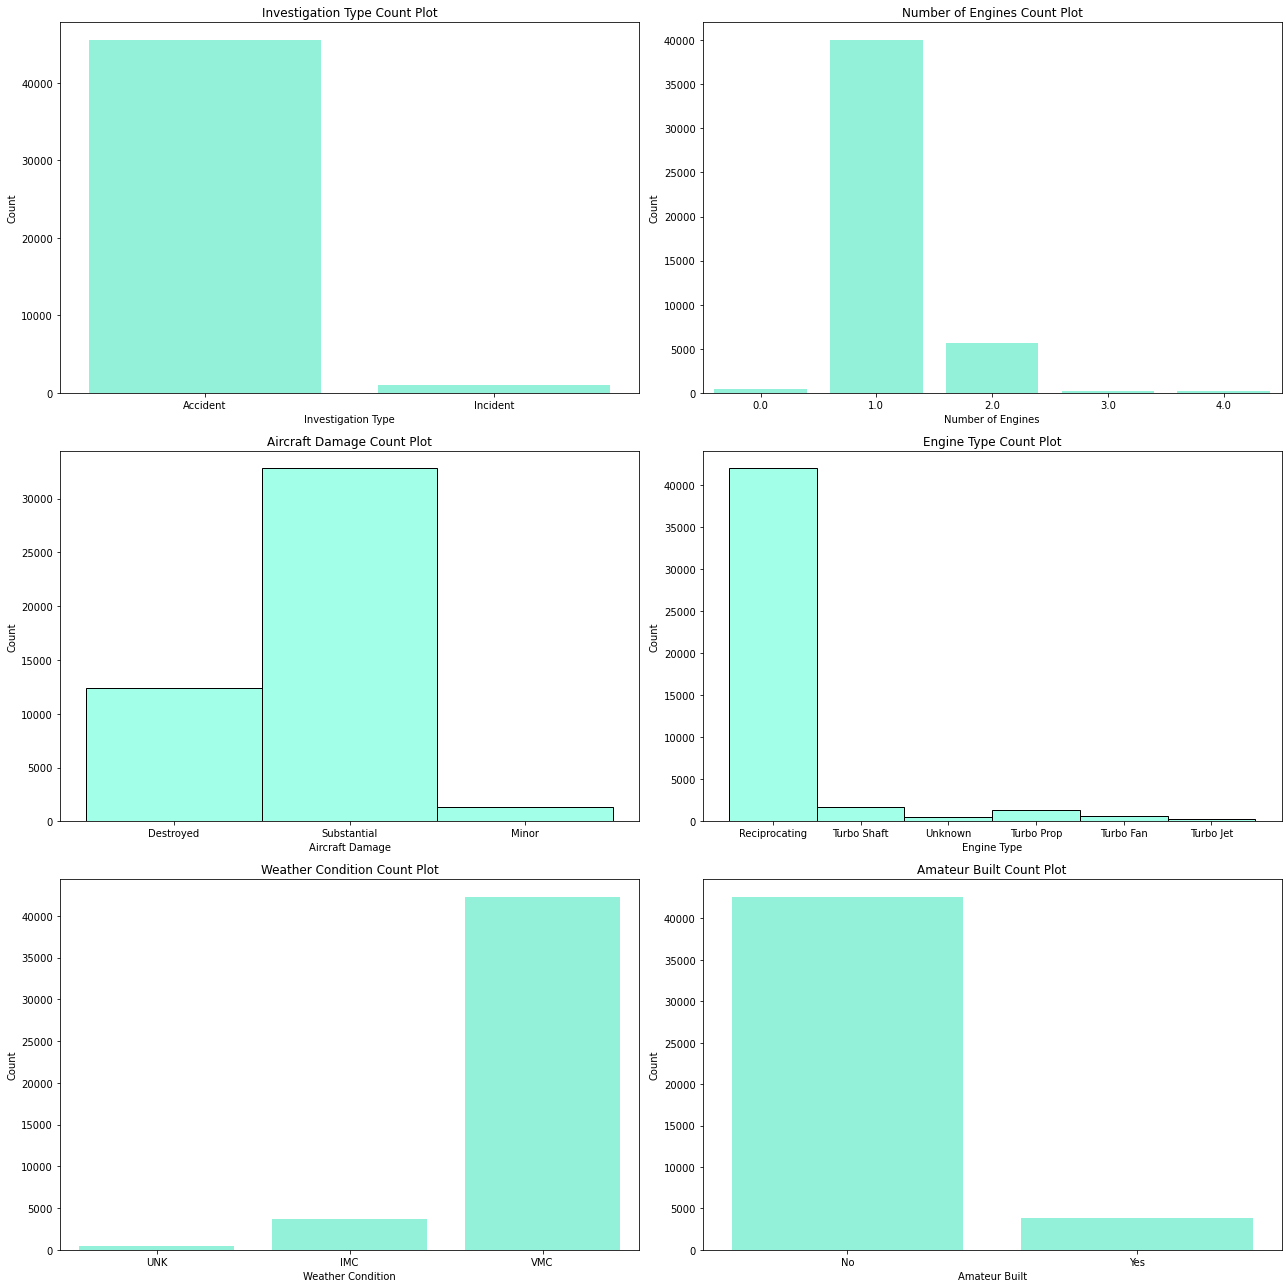

In [173]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18,18))

sns.countplot(x=df3['INVESTIGATION TYPE'], ax=axs[0,0], color='#83FFE1')
axs[0,0].set_title('Investigation Type Count Plot')
axs[0,0].set_ylabel('Count')
axs[0,0].set_xlabel('Investigation Type')


sns.countplot(x=df3['NUMBER OF ENGINES'], ax=axs[0,1], color='#83FFE1')
axs[0,1].set_title('Number of Engines Count Plot')
axs[0,1].set_ylabel('Count')
axs[0,1].set_xlabel('Number of Engines')

#flight_count = df3['PURPOSE OF FLIGHT'].value_counts()
sns.histplot(x=df3['ENGINE TYPE'], bins=5, ax=axs[1,1], color='#83FFE1')
axs[1,1].set_title('Engine Type Count Plot')
axs[1,1].set_ylabel('Count')
axs[1,1].set_xlabel('Engine Type')

sns.histplot(x=df3['AIRCRAFT DAMAGE'], bins=5, ax=axs[1,0], color='#83FFE1')
axs[1,0].set_title('Aircraft Damage Count Plot')
axs[1,0].set_ylabel('Count')
axs[1,0].set_xlabel('Aircraft Damage')

sns.countplot(x=df3['WEATHER CONDITION'], ax=axs[2,0], color='#83FFE1')
axs[2,0].set_title('Weather Condition Count Plot')
axs[2,0].set_ylabel('Count')
axs[2,0].set_xlabel('Weather Condition')


sns.countplot(x=df3['AMATEUR BUILT'], ax=axs[2,1], color='#83FFE1')
axs[2,1].set_title('Amateur Built Count Plot')
axs[2,1].set_ylabel('Count')
axs[2,1].set_xlabel('Amateur Built')


plt.tight_layout()
plt.show()




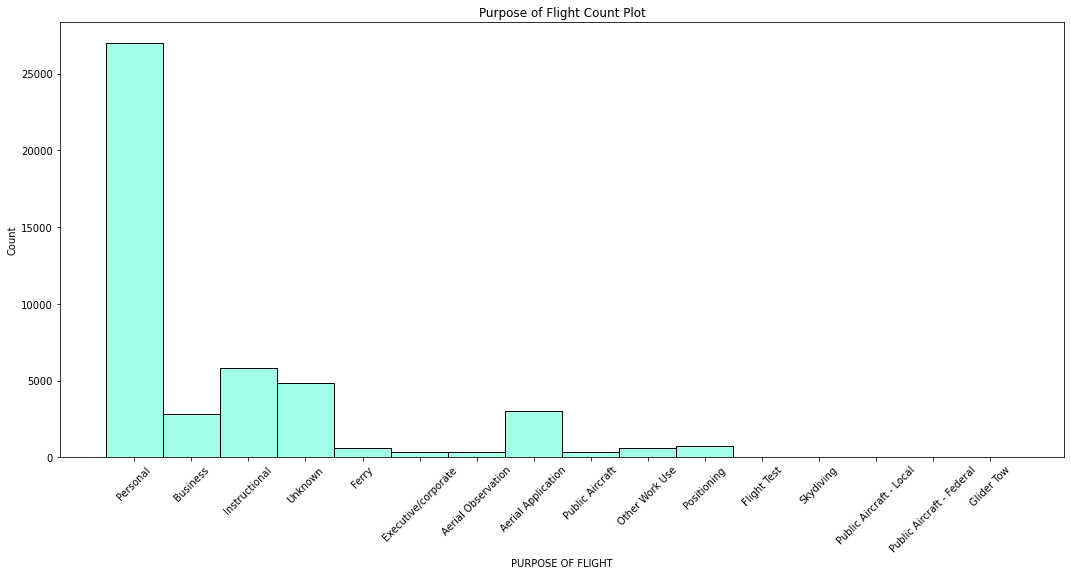

In [174]:
plt.figure(figsize=(18,8))
sns.histplot(x=df3['PURPOSE OF FLIGHT'], bins=15, color='#83FFE1')
plt.title('Purpose of Flight Count Plot')
plt.xticks(rotation=45)
plt.show()



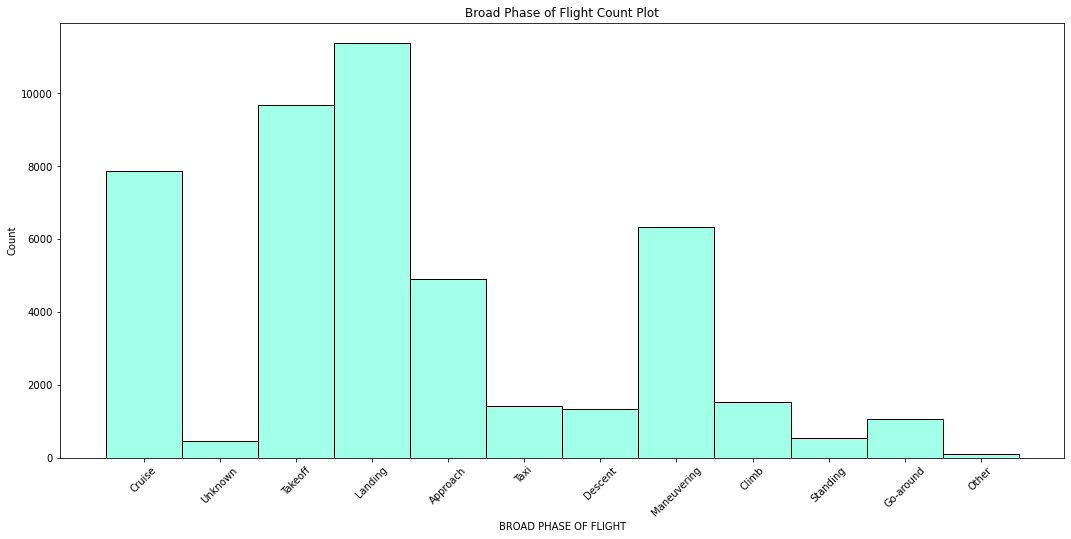

In [177]:
plt.figure(figsize=(18,8))
sns.histplot(x=df3['BROAD PHASE OF FLIGHT'], bins=15, color='#83FFE1')
plt.title('Broad Phase of Flight Count Plot')
plt.xticks(rotation=45)
plt.show()

## Explotary Data Analysis (EDA)

# 5.0 RECOMMENDATIONS